# Project proposal

---

Group name: Gruppe A

---


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

In the last 30 years, the dating approach has changed and has become increasingly difficult. The willingness to date has decreased, dating is too expensive and time consuming, we have too many (perceived) options to date someone and we struggle because of accepting too easily negative sex stereotypes. In the 19th century, a custom in the United States called New Year’s Calling, was that on New Year's Day many young, single women would hold an Open House (a party or reception during which a person's home is open to visitors) on 1 January where they would invite eligible bachelors, both friends and strangers, to stop by for a brief (no more than 10–15-minute) visit. This custom was established with the term SpeedDating as a registered trademark by Aish HaTorah, who began hosting SpeedDating events in 1998. 

10 years later, Fisman et al. conducted a survey regarding speed dating habits and collected 8,000 observations during his 2 – year observation in his paper Gender Differences in Mate Selection: Evidence from a Speed Dating Experiment. Because speed dating has become more and more interesting in the last few years and also through Corona a completely new dating approach has emerged, we want to discuss contexts in speed dating. With the data from this survey, we want to answer the following research questions:

-   What are the most effective characteristics to achieve a match in opposite sex speed dating?
-   What type of persons have the best chances to achieve a match regarding their characteristics? 

To answer our research question, we defined the following sub-questions to strengthen our main research question:

-   Do specific characteristics affect the match selection of the survey participants?
-   Do these specific characteristics occur in both sexes?
-   What type of persons participate in speed dating events?

The following hypotheses support our research question:
Null hypothesis: 
-   There is no affection of having specific characteristics regarding match selection of the survey participants

Hypotheses:
-   Survey participants who both have the specific characteristics samerace and opposite gender tend to achieve more matches
-   Survey participants with a higher income tend to achieve more matches than survey participants with a lower income
-   Achieving matches because of having the same specific characteristics occur in both sexes



## Data description

In this section, you will describe the data set you wish to explore. This includes

-   description of the observations in the data set,
-   description of how the data was originally collected (not how you found the data but how the original curator of the data collected it).

Where did the dataset come from? How was it collected? Why was it collected? Why were those variables included in the dataset? What units are those variables? How often was the data collected, and why?

- Dataset: https://perso.telecom-paristech.fr/eagan/class/igr204/datasets/SpeedDating.csv

We chose this specific dataset because we want to work on an existing dataset, which can answer our research question in the best possible way and provide qualitatively as well as quantitatively robust data. Also, we chose this dataset as our favorite, because it covers the topic that excites us the most.

The dataset was collected in one survey which lasted over the years from 2002 until 2004. The data was collected once with a significant number of observations, because the researcher did not want any possible duplications.

Speed dating data with over 8,000 observations of matches and non-matches, with answers to survey questions about how people rate themselves and how they rate others on several dimensions.
characterisitcs

- 195 Features
- 8378 Observations

Possible dependent variable: match




## Analysis approach

In this section, you will provide a brief overview of your analysis approach. This includes:


-   Description of the response variable.

    - The response variable "Match" indicates wether the people that met, did match or did not match.
    
<br>

- Visualization and summary statistics for the response variable.

-   List of variables that will be considered as predictors
    -   Gender
    -   Age
    -   Race
    -   Goal
    -   Interest Correlation
    -   Attributes (Attractiveness, Interest, Ambitions, Fun, Intelligence, Sincerence)
    
<br>
    
    
-   Your model type (what kind of model(s) will you use ... e.g. linear regression)
    - Multiple linear regression 
    - Classification 

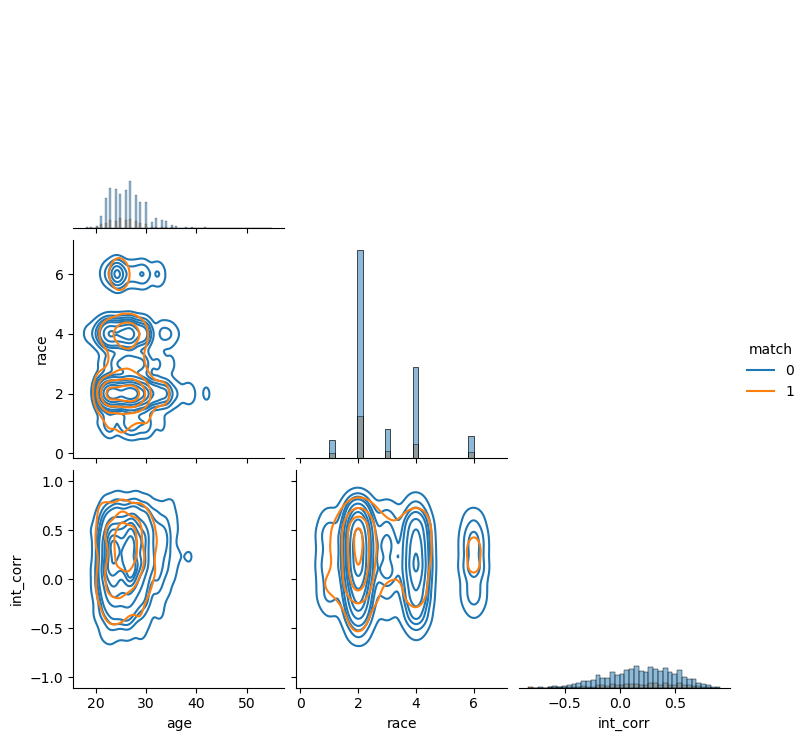

In [3]:
df = pd.read_csv("../data/raw/SpeedDating.csv",delimiter=",")
df.gender=df.gender.map({0:"Female",1:"Male"})
sns.pairplot(df[["age","race","int_corr","match"]],hue="match",corner=True,kind="kde",diag_kind="hist")


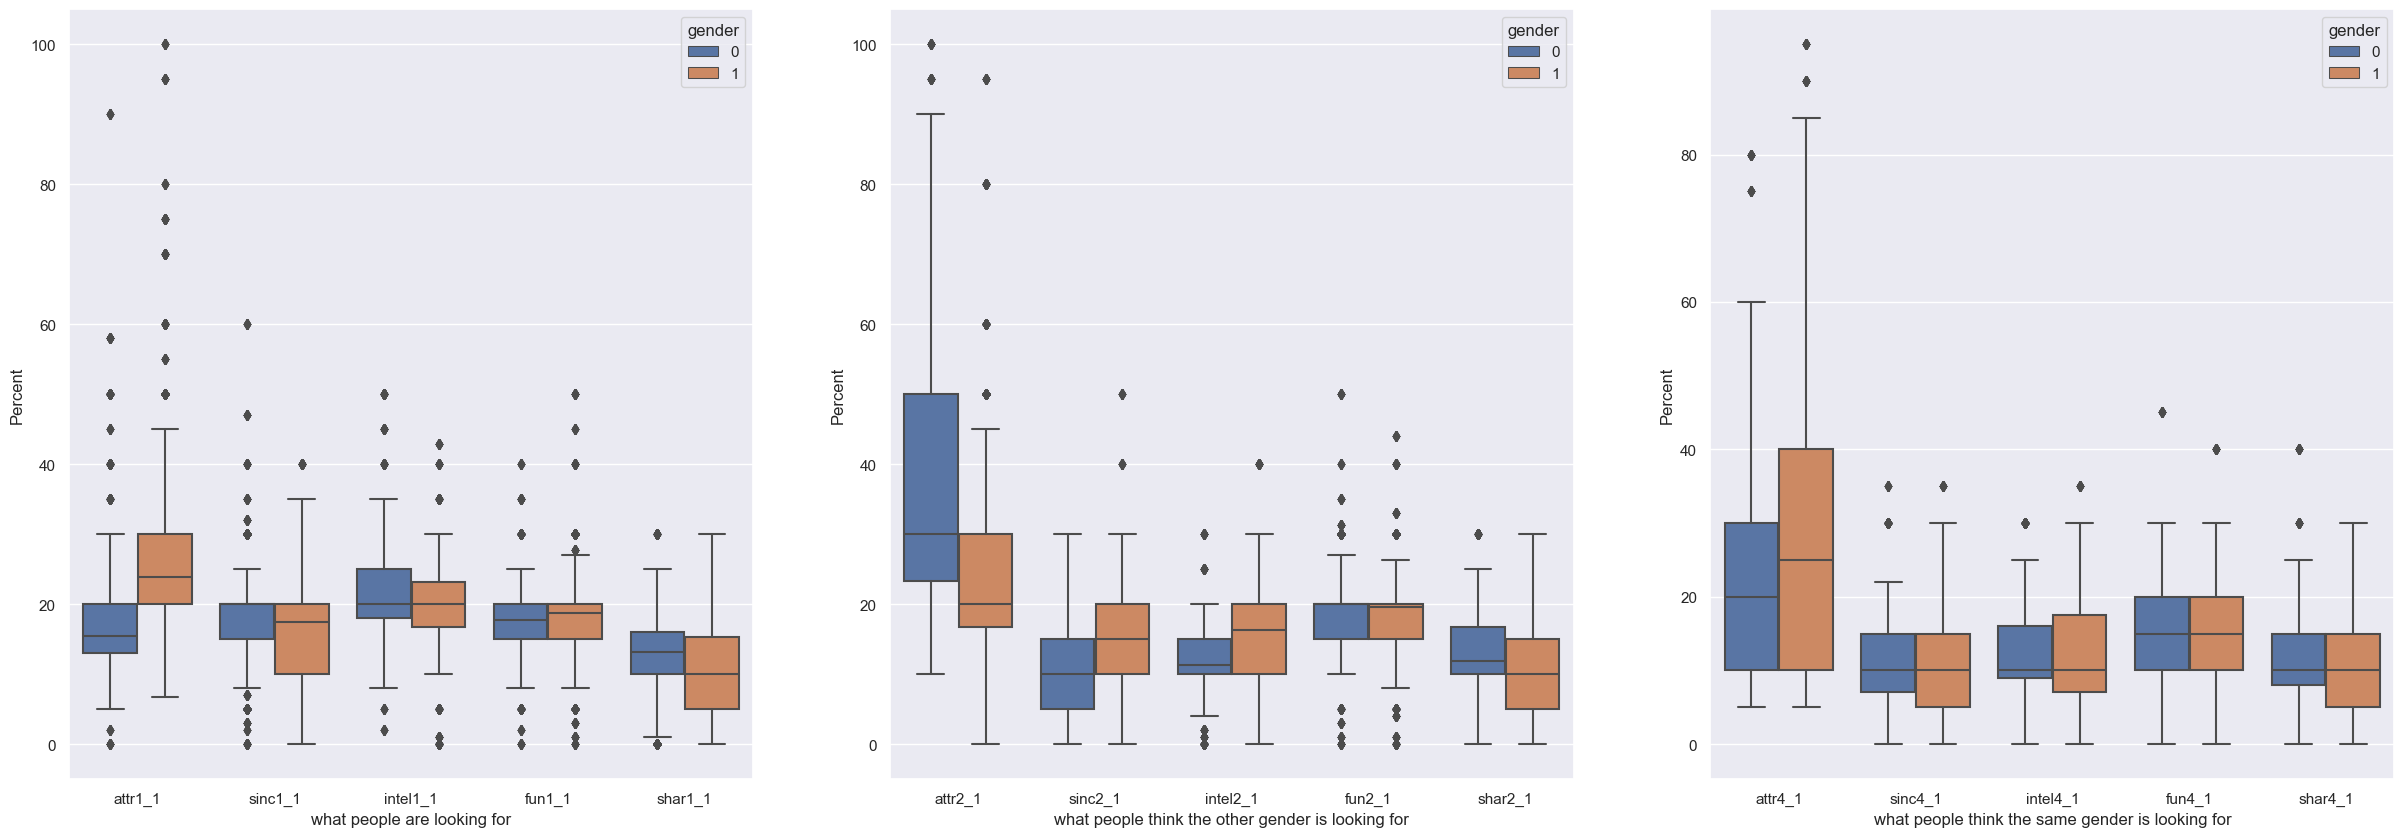

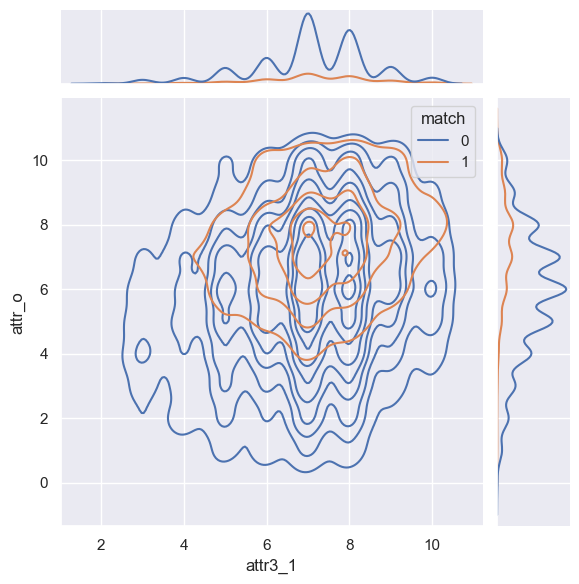

In [7]:
plt1=["attr1_1","sinc1_1","intel1_1","fun1_1","shar1_1"]
plt2=["attr2_1","sinc2_1","intel2_1","fun2_1","shar2_1"]
plt3=["attr4_1","sinc4_1","intel4_1","fun4_1","shar4_1"]
plt4=["attr3_1","sinc3_1","intel3_1","fun3_1"]

sns.set(rc={'figure.figsize':(30,10)})
fig, ax=plt.subplots(1,3)
df_plot1=df.melt(id_vars="gender",value_vars=plt1,var_name="what people are looking for",value_name="Percent")
df_plot2=df.melt(id_vars="gender",value_vars=plt2,var_name="what people think the other gender is looking for",value_name="Percent")
df_plot3=df.melt(id_vars="gender",value_vars=plt3,var_name="what people think the same gender is looking for",value_name="Percent")
df_plot4=df.melt(id_vars="match",value_vars=plt4,var_name="actual matches",value_name="Percent")
sns.boxplot(df_plot1,y="Percent",x="what people are looking for",hue="gender",ax=ax[0])
sns.boxplot(df_plot2,y="Percent",x="what people think the other gender is looking for",hue="gender",ax=ax[1])
sns.boxplot(df_plot3,y="Percent",x="what people think the same gender is looking for",hue="gender",ax=ax[2])
sns.jointplot(df[["attr3_1","attr_o","match"]],x="attr3_1",y="attr_o",hue="match",kind="kde")

## Data dictionary

*Create a data dictionary for all the variables in your data set. You may fill out the data description table or create your own table with Pandas:*

<br>

> These are the required data types

### General information

| Name     | Description                                                                                                         | Role      | Type    | Format   |
|----------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| iid      | Unique subject number (wave + id + gender)                                                                          | ID        | numeric | int      |
| id       | Subject number within wave                                                                                          | ID        | numeric | int      |
| gender   | Gender of the person. Female = 0, Male = 1                                                                          | predictor | nominal | category |
| idg      | Subject number within gender (id + gender)                                                                          | ID        | numeric | int      |
| condtn   | Condition of the wave, 1 = Limited choice, 2 = extensive choice                                                     | predictor | nominal | category |
| wave     | ID of the event                                                                                                     | ID        | numeric | int      |
| round    | Number of people that met in wave                                                                                   | predictor | numeric | int      |
| position | Station number where met partner                                                                                    | predictor | nominal | category |
| positin1 | Station number where started                                                                                        | predictor | nominal | category |
| order    | The number of date that night when met partner                                                                      | predictor | numeric | int      |
| partner  | Partner's ID number the night of event                                                                              | ID        | numeric | int      |
| pid      | Partner's IID number                                                                                                | ID        | numeric | int      |
| match    | 1 = yes, 0 = no                                                                                                     | response  | nominal | category |
| int_corr | Correlation between participant's and partner's ratings of interests in Time 1                                      | predictor | numeric | float    |
| samerace | Participant and the partner were the same race. 1 =  yes, 0 = no                                                    | predictor | nominal | category |
| age_o    | Age of partner                                                                                                      | predictor | nominal | category |
| race_o   | Race of partner                                                                                                     | predictor | nominal | category |
| pf_o_att | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sin | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_int | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_fun | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_amb | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| pf_o_sha | Partner's stated preference at Time 1. The sum of all pf_o_ elements must be 100.                                   | predictor | numeric | float    |
| dec_o    | Decision of partner the night of event                                                                              | predictor | nominal | category |
| attr_o   | Attractive. Rating by partner the night of the event frin 1 (awful) to 10 (great)                                   | predictor | ordinal | category |
| sinc_o   | Sincere. Rating by partner the night of the event frin 1 (awful) to 10 (great)                                      | predictor | ordinal | category |
| intel_o  | Intelligent. Rating by partner the night of the event frin 1 (awful) to 10 (great)                                  | predictor | ordinal | category |
| fun_o    | Fun. Rating by partner the night of the event frin 1 (awful) to 10 (great)                                          | predictor | ordinal | category |
| amb_o    | Ambitious. Rating by partner the night of the event frin 1 (awful) to 10 (great)                                    | predictor | ordinal | category |
| shar_o   | Shared Interests/Hobbies. Rating by partner the night of the event frin 1 (awful) to 10 (great)                     | predictor | ordinal | category |
| like_o   | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | ordinal | category |
| prob_o   | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | ordinal | category |
| met_o    | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Time 1: Survey filled out by students that are interested in participating in order to register for the event

| age       | Age of the person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | predictor | nominal | category |
|-----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| field     | Field of study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   | predictor | nominal | string   |
| field_cd  | Field of study coded.<br/>1= Law<br/>2= Math<br/>3= Social Science, Psychologist<br/>4= Medical Science, Pharmaceuticals, and Bio Tech<br/>5= Engineering<br/>6= English/Creative Writing/ Journalism<br/>7= History/Religion/Philosophy<br/>8= Business/Econ/Finance<br/>9= Education, Academia<br/>10= Biological Sciences/Chemistry/Physics<br/>11= Social Work<br/>12= Undergrad/undecided<br/>13=Political Science/International Affairs<br/>14=Film<br/>15=Fine Arts/Arts Administration<br/>16=Languages<br/>17=Architecture<br/>18=Other | predictor | nominal | category |
| undergrd  | School attended for undergraduate degree                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |           |         |          |
| mn_sat    | Median SAT score for the undergraduate institution where attended. Proxy for intelligence.                                                                                                                                                                                                                                                                                                                                                                                                                                                       |           |         |          |
| tuition   | Tuition listed for each response to undergrad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |           |         |          |
| race      | Race of the attendee<br/>1 = Black/African American<br/>2 = European/Caucasian-American<br/>3 = Latino/Hispanic American<br/>4 = Asian/Pacific Islander/Asian-American<br/>5 = Native American<br/>6 = Other                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| imprace   | How important is it that a person you date be of the same racial/ethic background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| imprelig  | How important is it that a person you date be of the same religious background? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | ordinal | category |
| from      | Where the person is originally from                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | nominal | string   |
| zipcode   | Zip code of the grow up area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | nominal | category |
| income    | Median household income based on zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | numeric | float    |
| goal      | What is the goal in participating in this event?<br/>1 = Seemed like a fun night out<br/>2 = To meet new people<br/>3 = To get a date<br/>4 = Looking for a serious relationship<br/>5  = To say I did it<br/>6 = Other                                                                                                                                                                                                                                                                                                                          | predictor | nominal | category |
| date      | How frequently do you go on dates? <br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| go out    | How often do you go out (not necessarily on dates)?<br/>1 = Several times a week<br/>2 = Twice a week<br/>3 = Once a week<br/>4 = Twice a month<br/>5 = Once a month<br/>6 = Several times a year<br/>7 = Almost never                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| career    | What is your intended career?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | nominal | string   |
| career_c  | Career coded.<br/>1 = Lawyer<br/>2 = Academic/Research<br/>3 = Psychologist<br/>4 = Doctor/Medicine<br/>5 =Engineer<br/>6 = Creative Arts/Entertainment<br/>7 = Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin<br/>8 = Real Estate<br/>9 = International/Humanitarian Affairs<br/>10 = Undecided<br/>11 = Social Work<br/>12 = Speech Pathology<br/>13 = Politics<br/>14 = Pro sports/Athletics<br/>15 = Other<br/>16 = Journalism<br/>17 = Architecture                                                                   | predictor | nominal | category |
| sports    | Playing sports/athletics. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | ordinal | category |
| tvsports  | Watching sports. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | ordinal | category |
| excersice | Body building/exercising. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | ordinal | category |
| dining    | Dining out. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | predictor | ordinal | category |
| museums   | Museums/galleries. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| art       | Art. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | predictor | ordinal | category |
| hiking    | Hiking/camping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | ordinal | category |
| gaming    | Gaming. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| clubbing  | Dancing/clubbing. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | predictor | ordinal | category |
| reading   | Reading. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | ordinal | category |
| tv        | Watching TV. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | predictor | ordinal | category |
| theater   | Theater. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | predictor | ordinal | category |
| movies    | Movies. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| concerts  | Going to concerts. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | predictor | ordinal | category |
| music     | Music. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | ordinal | category |
| shopping  | Shopping. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | predictor | ordinal | category |
| yoga      | Yoga/meditation. Interest in this Hobby from 1 - 10.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | ordinal | category |
| exhappy   | Overall, how happy do you expect to be with the people you meet during the event? (1 - 10)                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | ordinal | category |
| expnum    | Out of 20 people, how many do you expect will be interested in dating you?                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | predictor | numeric | int      |
| attr1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| sinc1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| intel1_1  | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| fun1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| amb1_1    | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| shar1_1   | What do you (personally) look for in the opposite sex. The sum of all attr1_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                              | predictor | numeric | float    |
| attr4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| sinc4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| intel4_1  | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| fun4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| amb4_1    | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| shar4_1   | What do you think your fellow men/woman look for in the opposite sex. The sum of all attr4_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                               | predictor | numeric | float    |
| attr2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| sinc2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| intel2_1  | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| fun2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| amb2_1    | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| shar2_1   | What do you think the opposite sex looks for in a date. The sum of all attr2_1 elements must be 100.                                                                                                                                                                                                                                                                                                                                                                                                                                             | predictor | numeric | float    |
| attr3_1   | Rate yourself from 1 - 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | predictor | ordinal | category |
| sinc3_1   | Rate yourself from 1 - 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | predictor | ordinal | category |
| intel3_1  | Rate yourself from 1 - 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | predictor | ordinal | category |
| fun3_1    | Rate yourself from 1 - 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | predictor | ordinal | category |
| amb3_1    | Rate yourself from 1 - 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | predictor | ordinal | category |
| attr5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| sinc5_1   | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| intel5_1  | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| fun5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |
| amb5_1    | How do you think others perceive you? 1 = awful, 10 = great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | predictor | ordinal | category |

### Round 2: Filled out by subjects after each "date" during the event.

| dec   | Decision if you want to see the person again (1) or not (0)                                                         | predictor | nominal | category |
|-------|---------------------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| attr  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| sinc  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| intel | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| fun   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| amb   | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| shar  | Rating of the attribute for this person from 1 - 10.                                                                | predictor | ordinal | category |
| like  | Overall, how much do oyu like this person. 1 (don't like at all) to 10 (like a lot)                                 | predictor | ordinal | category |
| prob  | How probable do you think it is that this person will say 'yes' for you? 1 (not probable) to 10 (extemely probable) | predictor | ordinal | category |
| met   | Have you met this person before? (1 = yes, 2 = no)                                                                  | predictor | ordinal | category |

### Half way through meeting all potential dates during the night of the event on their scorecard

| attr1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
|----------|-----------------------------------------------------------------------|-----------|---------|----------|
| sinc1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
| intel1_s | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
| fun1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
| amb1_s   | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
| shar1_s  | What do you (personally) look for in the opposite sex. 1 - 10 rating. | predictor | ordinal | category |
| attr4_s  | Rate yourself from 1 - 10                                             | predictor | ordinal | category |
| sinc4_s  | Rate yourself from 1 - 10                                             | predictor | ordinal | category |
| intel4_s | Rate yourself from 1 - 10                                             | predictor | ordinal | category |
| fun4_s   | Rate yourself from 1 - 10                                             | predictor | ordinal | category |
| amb4_s   | Rate yourself from 1 - 10                                             | predictor | ordinal | category |

### Time 2: Survey is filled out the day after participating in the event. Subjects must have submitted this in order to be sent their matches.

| satis_2  | Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied) | predictor | ordinal | category |
|----------|-----------------------------------------------------------------------------------------------------------|-----------|---------|----------|
| length   | Four minutes is:<br/>1 = Too little,<br/>2 = Too much<br/>3 = Just Right                                  | predictor | nominal | category |
| numdat_2 | The number of Speed "Dates" you had was:<br/>1 = Too few,<br/>2 = Too many,<br/>3 = Just right            | predictor | nominal | category |

... and again the same questions regarding attributes

### Time 3: Subjects filled out 3-4 weeks after they had been sent their matches

| you_call | How many have you contacted to set up a date?                         | predictor | numeric | int      |
|----------|-----------------------------------------------------------------------|-----------|---------|----------|
| them_cal | How many have contacted you?                                          | predictor | numeric | int      |
| date_3   | Have you been on a date with any of your matches? Yes=1 No=2          | predictor | nominal | category |
| numdat_3 | If yes, how many of your matches have you been on a date with so far? | predictor | numeric | int      |
| num_in_3 | If yes, how many?                                                     | predictor | numeric | int      |

... and again the same questions regarding attributes

<br>

- `Role`: response, predictor, ID (ID columns are not used in a model but can help to better understand the data)

- `Type`: nominal, ordinal or numeric

- `Format`: int, float, string, category, date or object

## Actual datatypes

In [5]:
import pandas as pd
df = pd.read_csv("../data/raw/SpeedDating.csv",delimiter=",")

dtypes = df.dtypes.to_dict()
i = 0;
print("{:<10} {:<10} {:<10}".format('Id', 'Name','Type'))
for key, value in dtypes.items():
   i += 1;
   print("{:<10} {:<10} {:<10}".format(i,key,str(value)))

Id         Name       Type      
1          iid        int64     
2          id         float64   
3          gender     int64     
4          idg        int64     
5          condtn     int64     
6          wave       int64     
7          round      int64     
8          position   int64     
9          positin1   float64   
10         order      int64     
11         partner    int64     
12         pid        float64   
13         match      int64     
14         int_corr   float64   
15         samerace   int64     
16         age_o      float64   
17         race_o     float64   
18         pf_o_att   float64   
19         pf_o_sin   float64   
20         pf_o_int   float64   
21         pf_o_fun   float64   
22         pf_o_amb   float64   
23         pf_o_sha   float64   
24         dec_o      int64     
25         attr_o     float64   
26         sinc_o     float64   
27         intel_o    float64   
28         fun_o      float64   
29         amb_o      float64   
30        

> These are the current data types

| Id         | Name       | Type       |
|------------|------------|------------|
| 1          | iid        | int64      |
| 2          | id         | float64    |
| 3          | gender     | int64      |
| 4          | idg        | int64      |
| 5          | condtn     | int64      |
| 6          | wave       | int64      |
| 7          | round      | int64      |
| 8          | position   | int64      |
| 9          | positin1   | float64    |
| 10         | order      | int64      |
| 11         | partner    | int64      |
| 12         | pid        | float64    |
| 13         | match      | int64      |
| 14         | int_corr   | float64    |
| 15         | samerace   | int64      |
| 16         | age_o      | float64    |
| 17         | race_o     | float64    |
| 18         | pf_o_att   | float64    |
| 19         | pf_o_sin   | float64    |
| 20         | pf_o_int   | float64    |
| 21         | pf_o_fun   | float64    |
| 22         | pf_o_amb   | float64    |
| 23         | pf_o_sha   | float64    |
| 24         | dec_o      | int64      |
| 25         | attr_o     | float64    |
| 26         | sinc_o     | float64    |
| 27         | intel_o    | float64    |
| 28         | fun_o      | float64    |
| 29         | amb_o      | float64    |
| 30         | shar_o     | float64    |
| 31         | like_o     | float64    |
| 32         | prob_o     | float64    |
| 33         | met_o      | float64    |
| 34         | age        | float64    |
| 35         | field      | object     |
| 36         | field_cd   | float64    |
| 37         | undergra   | object     |
| 38         | mn_sat     | object     |
| 39         | tuition    | object     |
| 40         | race       | float64    |
| 41         | imprace    | float64    |
| 42         | imprelig   | float64    |
| 43         | from       | object     |
| 44         | zipcode    | object     |
| 45         | income     | object     |
| 46         | goal       | float64    |
| 47         | date       | float64    |
| 48         | go_out     | float64    |
| 49         | career     | object     |
| 50         | career_c   | float64    |
| 51         | sports     | float64    |
| 52         | tvsports   | float64    |
| 53         | exercise   | float64    |
| 54         | dining     | float64    |
| 55         | museums    | float64    |
| 56         | art        | float64    |
| 57         | hiking     | float64    |
| 58         | gaming     | float64    |
| 59         | clubbing   | float64    |
| 60         | reading    | float64    |
| 61         | tv         | float64    |
| 62         | theater    | float64    |
| 63         | movies     | float64    |
| 64         | concerts   | float64    |
| 65         | music      | float64    |
| 66         | shopping   | float64    |
| 67         | yoga       | float64    |
| 68         | exphappy   | float64    |
| 69         | expnum     | float64    |
| 70         | attr1_1    | float64    |
| 71         | sinc1_1    | float64    |
| 72         | intel1_1   | float64    |
| 73         | fun1_1     | float64    |
| 74         | amb1_1     | float64    |
| 75         | shar1_1    | float64    |
| 76         | attr4_1    | float64    |
| 77         | sinc4_1    | float64    |
| 78         | intel4_1   | float64    |
| 79         | fun4_1     | float64    |
| 80         | amb4_1     | float64    |
| 81         | shar4_1    | float64    |
| 82         | attr2_1    | float64    |
| 83         | sinc2_1    | float64    |
| 84         | intel2_1   | float64    |
| 85         | fun2_1     | float64    |
| 86         | amb2_1     | float64    |
| 87         | shar2_1    | float64    |
| 88         | attr3_1    | float64    |
| 89         | sinc3_1    | float64    |
| 90         | fun3_1     | float64    |
| 91         | intel3_1   | float64    |
| 92         | amb3_1     | float64    |
| 93         | attr5_1    | float64    |
| 94         | sinc5_1    | float64    |
| 95         | intel5_1   | float64    |
| 96         | fun5_1     | float64    |
| 97         | amb5_1     | float64    |
| 98         | dec        | int64      |
| 99         | attr       | float64    |
| 100        | sinc       | float64    |
| 101        | intel      | float64    |
| 102        | fun        | float64    |
| 103        | amb        | float64    |
| 104        | shar       | float64    |
| 105        | like       | float64    |
| 106        | prob       | float64    |
| 107        | met        | float64    |
| 108        | match_es   | float64    |
| 109        | attr1_s    | float64    |
| 110        | sinc1_s    | float64    |
| 111        | intel1_s   | float64    |
| 112        | fun1_s     | float64    |
| 113        | amb1_s     | float64    |
| 114        | shar1_s    | float64    |
| 115        | attr3_s    | float64    |
| 116        | sinc3_s    | float64    |
| 117        | intel3_s   | float64    |
| 118        | fun3_s     | float64    |
| 119        | amb3_s     | float64    |
| 120        | satis_2    | float64    |
| 121        | length     | float64    |
| 122        | numdat_2   | float64    |
| 123        | attr7_2    | float64    |
| 124        | sinc7_2    | float64    |
| 125        | intel7_2   | float64    |
| 126        | fun7_2     | float64    |
| 127        | amb7_2     | float64    |
| 128        | shar7_2    | float64    |
| 129        | attr1_2    | float64    |
| 130        | sinc1_2    | float64    |
| 131        | intel1_2   | float64    |
| 132        | fun1_2     | float64    |
| 133        | amb1_2     | float64    |
| 134        | shar1_2    | float64    |
| 135        | attr4_2    | float64    |
| 136        | sinc4_2    | float64    |
| 137        | intel4_2   | float64    |
| 138        | fun4_2     | float64    |
| 139        | amb4_2     | float64    |
| 140        | shar4_2    | float64    |
| 141        | attr2_2    | float64    |
| 142        | sinc2_2    | float64    |
| 143        | intel2_2   | float64    |
| 144        | fun2_2     | float64    |
| 145        | amb2_2     | float64    |
| 146        | shar2_2    | float64    |
| 147        | attr3_2    | float64    |
| 148        | sinc3_2    | float64    |
| 149        | intel3_2   | float64    |
| 150        | fun3_2     | float64    |
| 151        | amb3_2     | float64    |
| 152        | attr5_2    | float64    |
| 153        | sinc5_2    | float64    |
| 154        | intel5_2   | float64    |
| 155        | fun5_2     | float64    |
| 156        | amb5_2     | float64    |
| 157        | you_call   | float64    |
| 158        | them_cal   | float64    |
| 159        | date_3     | float64    |
| 160        | numdat_3   | float64    |
| 161        | num_in_3   | float64    |
| 162        | attr1_3    | float64    |
| 163        | sinc1_3    | float64    |
| 164        | intel1_3   | float64    |
| 165        | fun1_3     | float64    |
| 166        | amb1_3     | float64    |
| 167        | shar1_3    | float64    |
| 168        | attr7_3    | float64    |
| 169        | sinc7_3    | float64    |
| 170        | intel7_3   | float64    |
| 171        | fun7_3     | float64    |
| 172        | amb7_3     | float64    |
| 173        | shar7_3    | float64    |
| 174        | attr4_3    | float64    |
| 175        | sinc4_3    | float64    |
| 176        | intel4_3   | float64    |
| 177        | fun4_3     | float64    |
| 178        | amb4_3     | float64    |
| 179        | shar4_3    | float64    |
| 180        | attr2_3    | float64    |
| 181        | sinc2_3    | float64    |
| 182        | intel2_3   | float64    |
| 183        | fun2_3     | float64    |
| 184        | amb2_3     | float64    |
| 185        | shar2_3    | float64    |
| 186        | attr3_3    | float64    |
| 187        | sinc3_3    | float64    |
| 188        | intel3_3   | float64    |
| 189        | fun3_3     | float64    |
| 190        | amb3_3     | float64    |
| 191        | attr5_3    | float64    |
| 192        | sinc5_3    | float64    |
| 193        | intel5_3   | float64    |
| 194        | fun5_3     | float64    |
| 195        | amb5_3     | float64    |